In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import json
import math
from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import stats
from scipy.stats import gaussian_kde

from scipy.spatial import ConvexHull, convex_hull_plot_2d

from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

from scipy.signal import argrelextrema,argrelmax

from itertools import chain
import numpy as np; np.random.seed(1)
%matplotlib notebook

In [13]:
from scipy.spatial import Delaunay
import numpy as np

def alpha_shape(points, alpha, only_outer=False):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    print(points.shape)
#     count = 0
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
#                 print('only outer')
#                 count = count + 1
                edges.remove((j, i))
                
            return
        edges.add((i, j))
        
#     print(count)
    tri = Delaunay(points)
#     print(tri.simplices)
#     plt.triplot(points[:,0], points[:,1], tri.simplices)
#     plt.plot(points[:,0], points[:,1], 'o')
#     plt.show()
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.simplices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
#         [46.276     -0.4620014] [46.276      -0.52229992] [46.276      -0.52229992]
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        
        if area == 0:
            circum_r = alpha
#             print(pa, pb, pc)
#             print('a ', a)
#             print('b ', b)
#             print('c', c)
#             print('s', s)            
        else:
            circum_r = a * b * c / (4.0 * area)           
#         circum_r = a * b * c / (4.0 * area)
        if circum_r <= alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    plt.show()
    return edges

In [14]:
def find_edges_with(i, edge_set):
    i_first = [j for (x,j) in edge_set if x==i]
    i_second = [j for (j,x) in edge_set if x==i]
    return i_first,i_second

def stitch_boundaries(edges):
    edge_set = edges.copy()
    boundary_lst = []
    while len(edge_set) > 0:
        boundary = []
        edge0 = edge_set.pop()
        boundary.append(edge0)
        last_edge = edge0
        while len(edge_set) > 0:
            i,j = last_edge
            j_first, j_second = find_edges_with(j, edge_set)
            if j_first:
                edge_set.remove((j, j_first[0]))
                edge_with_j = (j, j_first[0])
                boundary.append(edge_with_j)
                last_edge = edge_with_j
            elif j_second:
                edge_set.remove((j_second[0], j))
                edge_with_j = (j, j_second[0])  # flip edge rep
                boundary.append(edge_with_j)
                last_edge = edge_with_j

            if edge0[0] == last_edge[1]:
                break

        boundary_lst.append(boundary)
    return boundary_lst

210.csv
(13262, 2)


<IPython.core.display.Javascript object>


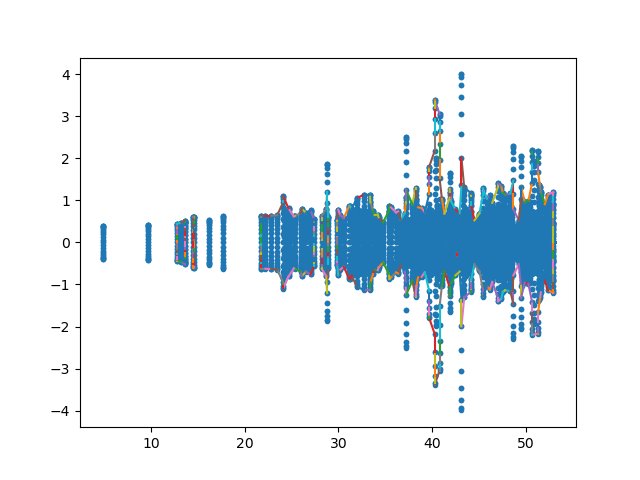

area = 59.07313967271047 , length = 102.02828951073394, bounds = (12.729, -3.3916, 52.959, 3.3916), slope=0.16861048968431516
211.csv
(11324, 2)


<IPython.core.display.Javascript object>


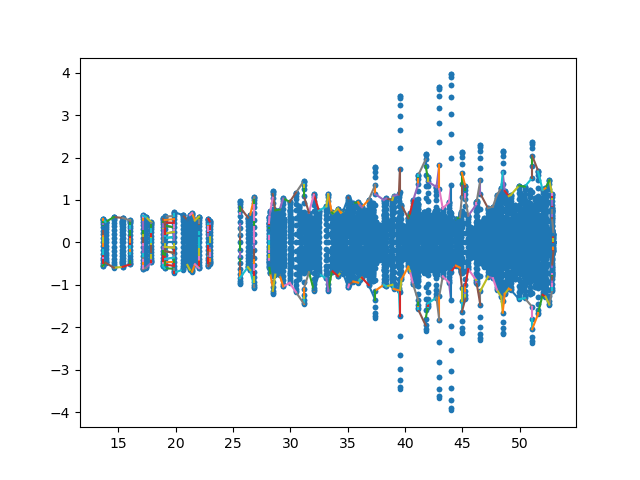

area = 62.44042575518492 , length = 104.36371388223228, bounds = (13.609000000000002, -2.044772586027938, 52.94600000000001, 2.0447725860279378), slope=0.10396179607127833
212.csv
(10678, 2)


<IPython.core.display.Javascript object>


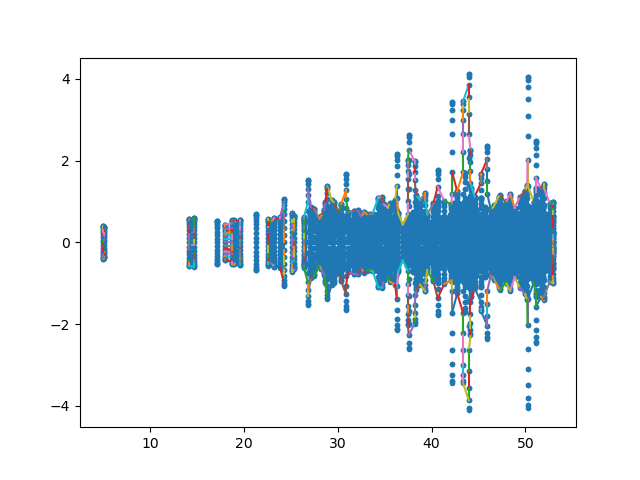

area = 64.66641142566559 , length = 120.34433589525555, bounds = (4.9403, -3.863922081201912, 52.997, 3.863922081201912), slope=0.16080680035049896
213.csv
(9006, 2)


<IPython.core.display.Javascript object>


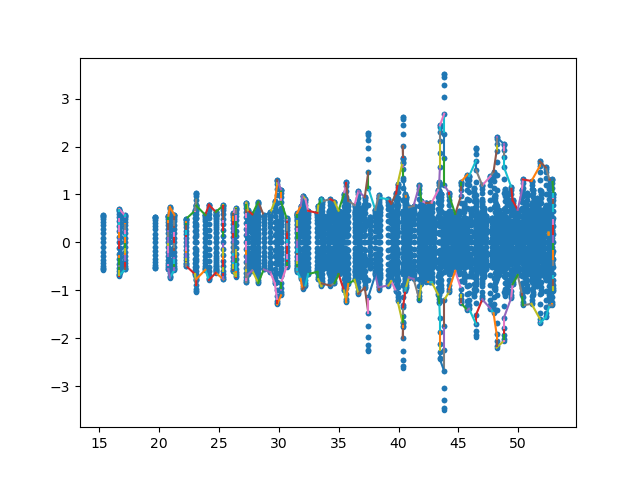

area = 58.32189384916514 , length = 97.67558230247658, bounds = (16.663, -2.685292213243564, 52.938, 2.685292213243564), slope=0.14805194835250524
214.csv
(9044, 2)


<IPython.core.display.Javascript object>


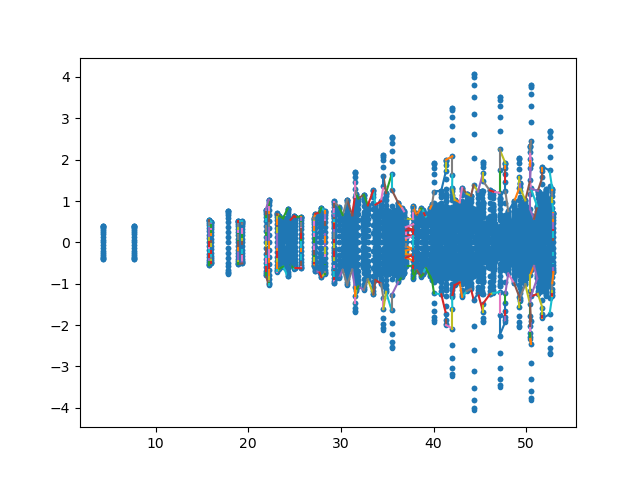

area = 61.66068096829855 , length = 95.06998361821617, bounds = (15.759, -2.252649169120176, 52.945, 2.2526491691201755), slope=0.12115576663906714
215.csv
(11666, 2)


<IPython.core.display.Javascript object>


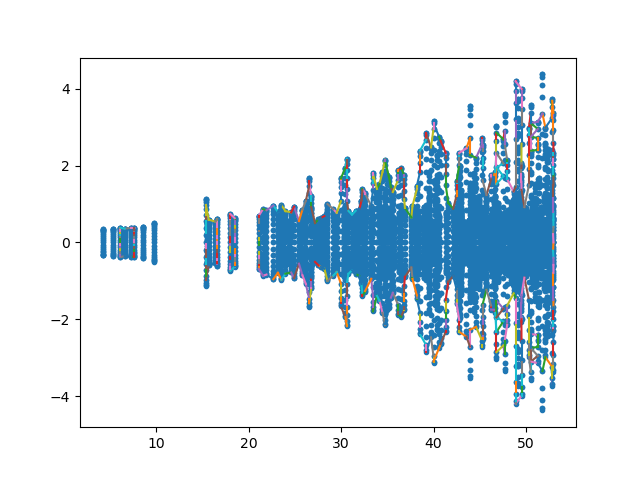

area = 108.99113892692257 , length = 136.99334652169534, bounds = (6.1373, -4.1932, 52.966, 4.1932), slope=0.17908675662574447
216.csv
(10564, 2)


<IPython.core.display.Javascript object>


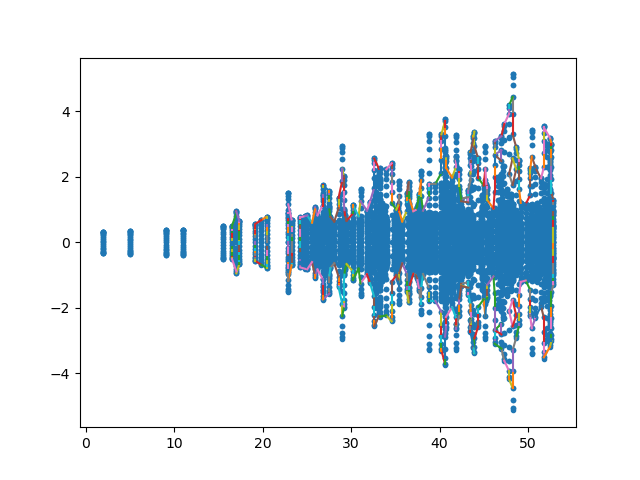

area = 105.22788114792678 , length = 136.4838538394273, bounds = (16.553, -4.442108667481522, 52.872, 4.44210866748152), slope=0.2446162431499502
217.csv
(10488, 2)


<IPython.core.display.Javascript object>


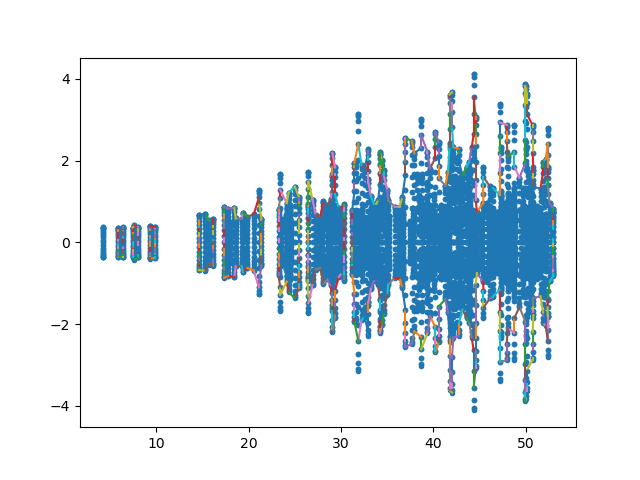

area = 102.09505367193329 , length = 150.16255179460876, bounds = (5.8129, -3.8817, 52.993, 3.8817), slope=0.16454818874907004
218.csv
(7068, 2)


<IPython.core.display.Javascript object>


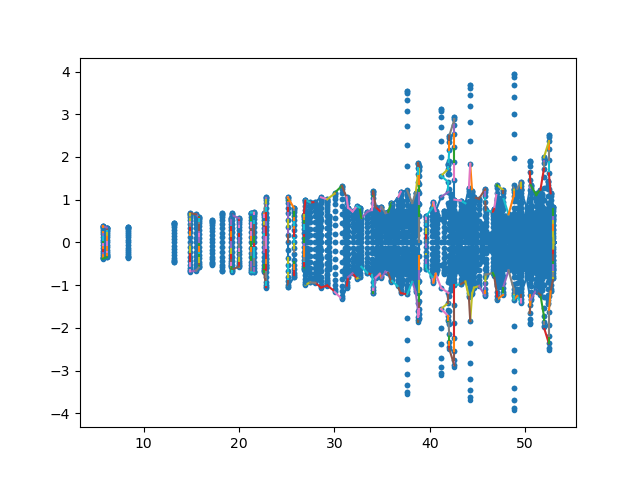

area = 59.235241709375124 , length = 107.57997756205887, bounds = (5.6858, -2.8817444459703823, 52.97, 2.8817444459703823), slope=0.12189037547300716
219.csv
(9500, 2)


<IPython.core.display.Javascript object>


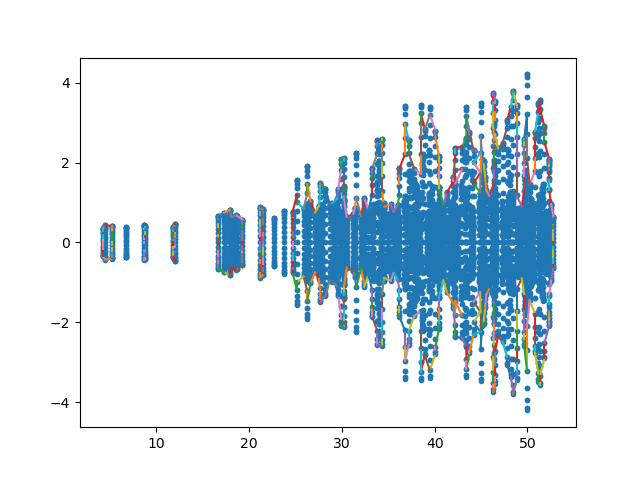

area = 105.76750247207718 , length = 138.1838022354173, bounds = (4.2089, -3.7957, 52.798, 3.7957), slope=0.156236686828939


In [18]:
# new calculation for shape similarity

# folders = [f for f in listdir("data/input/")]
columns = ['id', 'area', 'length', 'height', 'width', 'slope']

fileName = []
area = []
length = []
height = []
width = []
slope = []

alphaValue = 0.4
ordBounLen = 9
maximaDistance = 0.4
        
# folders = ['contrails1', 'contrails2', 'contrails3']
folders = ['newData']
# print(folders)
for folder in folders:
    onlyfiles = [f for f in listdir("data/input/{}".format(folder)) ]
    for file in onlyfiles:
        df = pd.read_csv('data/input/{}/{}'.format(folder,file))
        print(file)
        x = df['Points:0'].to_numpy()
        y = df['Points:1'].to_numpy()

        inside = ((x ** 2 + y ** 2 > 1.0) & ((x - 3) ** 2 + y ** 2 > 1.0))

        points = np.vstack([x[inside], y[inside]]).T

        # Computing the alpha shape
        edges = alpha_shape(points, alpha=alphaValue, only_outer=True)
        
        # Plotting the output
        plt.figure()
        plt.plot(points[:, 0], points[:, 1], '.')
        for i, j in edges:
            plt.plot(points[[i, j], 0], points[[i, j], 1])
        plt.show()       

        orderedBoundaries = stitch_boundaries(edges)

        maxL = []
        index = []
        for i in range(len(orderedBoundaries)):
            if len(orderedBoundaries[i]) > ordBounLen:
                maxL.append(len(orderedBoundaries[i]))
                index.append(i)


        noise = "none"
        toChange = 0
        
        shapeData = []
        
        jsonData = []

        for i in index:
            bound = []
            jsonbound = []
            count = 0
            for j in orderedBoundaries[i]:    
                if count == 0:
                    if noise != 'none' and noise == abs(points[j[0]][1]):
                        if points[j[0]][1] < 0:
                            bound.append((points[j[0]][0], toChange * -1)) 
                            jsonbound.append({"X":points[j[0]][0], "Y": toChange * -1}) 
                        else:
                            bound.append((points[j[0]][0], toChange))
                            jsonbound.append({"X":points[j[0]][0], "Y": toChange}) 
                            
                        bound.append((points[j[1]][0], points[j[1]][1])) 
                        jsonbound.append({"X":points[j[1]][0], "Y": points[j[1]][1]}) 

                    elif noise != 'none' and noise == abs(points[j[1]][1]):                
                        bound.append((points[j[0]][0], points[j[0]][1]))
                        jsonbound.append({"X":points[j[0]][0], "Y": points[j[0]][1]}) 
                        if points[j[1]][1] < 0:
                            bound.append((points[j[1]][0], toChange * -1))
                            jsonbound.append({"X": points[j[1]][0], "Y":toChange * -1})
                        else:
                            bound.append((points[j[1]][0], toChange))
                            jsonbound.append({"X": points[j[1]][0], "Y": toChange})

                    else:
                        bound.append((points[j[0]][0], points[j[0]][1]))
                        bound.append((points[j[1]][0], points[j[1]][1]))
                        
                        jsonbound.append({'X': points[j[0]][0], 'Y': points[j[0]][1]})
                        jsonbound.append({'X': points[j[1]][0], 'Y': points[j[1]][1]})

                    count = count + 1
                else:
                    if noise != 'none' and noise == abs(points[j[1]][1]):
                        if points[j[1]][1] < 0:
                            bound.append((points[j[1]][0], toChange * -1))
                            jsonbound.append({"X": points[j[1]][0], "Y": toChange * -1})
                        else:
                            bound.append((points[j[1]][0], toChange))
                            jsonbound.append({"X": points[j[1]][0], "Y": toChange})

                    elif noise != 'none' and abs(points[j[1]][1]) > toChange:
                        pass
                    else:
                        bound.append((points[j[1]][0], points[j[1]][1]))
                        jsonbound.append({'X': points[j[1]][0], 'Y': points[j[1]][1]})

            poly = Polygon(bound)
        #             poly = poly.buffer(10, join_style=1).buffer(-10.0, join_style=1)
            shapeData.append(poly)
            
            jsonData.append(jsonbound)

        polygon = MultiPolygon(shapeData)

        minx,miny,maxx,maxy = polygon.bounds

#         plt.figure()
#         for geom in polygon.geoms:
#             x,y = geom.exterior.xy

#             plt.plot(x,y)
#         plt.show()

#         fileName.append('{}_{}'.format(folder, file))
        fileName.append(file)
        area.append(round(polygon.area, 4))
        length.append(round(polygon.length, 4))
        h = abs(maxy - miny)
        height.append(round(h, 4))
        w = abs(maxx - minx)
        width.append(round(w, 4))
        s = (maxy - miny) / (maxx - minx)
        slope.append(round(s, 4))

        print("area = {} , length = {}, bounds = {}, slope={}".format(polygon.area , polygon.length, polygon.bounds, s))

        # print(fileName)
        # print(area)
        # print(length)
        # print(height)
        # print(width)
#         print(folder)
        similarityAttributes = pd.DataFrame(np.column_stack([fileName, area, length, height, width, slope]), columns = columns)
#         print(similarityAttributes)
#         name = file.replace(".csv","")
#         with open('data/output/withNoise/{}/{}.json'.format(folder, name), 'w') as outfile:
#             json.dump(jsonData, outfile)
#         print("extracted {}".format(file))


<IPython.core.display.Javascript object>


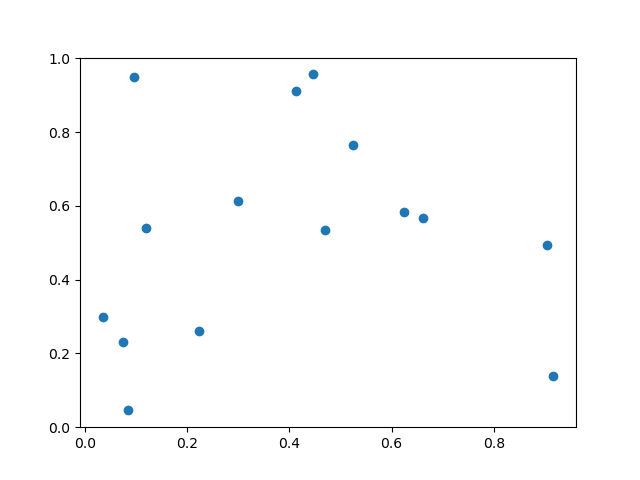

In [19]:
x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        print(ind)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()